In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

### Generate Data

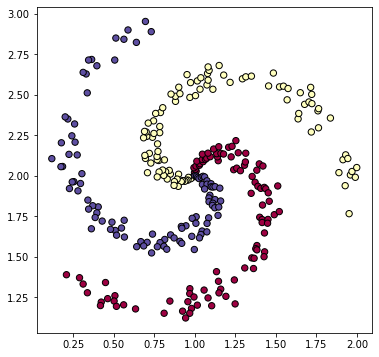

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
seed = 4 #keep seed
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
np.random.seed(seed) #fixing random 
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
X[:, 0] += 1
X[:, 1] += 2


plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors="black")
ax = plt.gca()
ax.set_aspect("equal")
plt.show()

### Function for plotting decision boundaries

In [3]:
def plot(h=0.02):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))
    x = np.column_stack([xx.ravel(), yy.ravel()]).astype('float32')
    Z = tf.argmax(logistic_regression(x),1)
    Z = tf.reshape(Z,xx.shape)

    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.gca().set_aspect("equal")
    plt.show()

### Some hyperparameters

### Logistic (softmax) regression

### Train and plot

Please plot decision boundaries at each display step. You can use `IPython.display.clear_output(wait=True)` for "animated" plot. Also print training step and according loss and accuracy. 

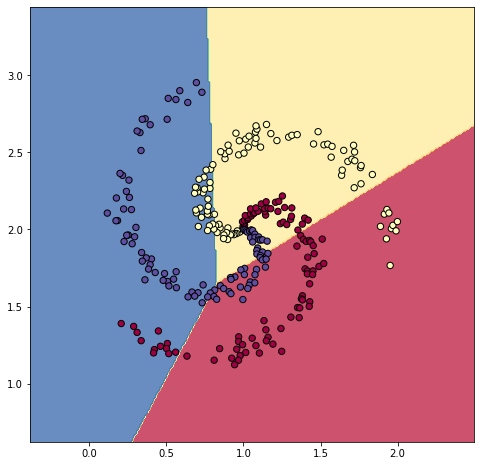

step: 200, loss: 0.935067, accuracy: 0.553333


# Quite bad, right? 
# Now create a neural network to overcome the nonlinearity! Please make a similar separate notebook for that. 
### I will be looking for `NN_on_Spiral_Dataset.ipynb`